# Housing Prediction

## Dataset : Ames Housing

-	SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
-	MSSubClass: The building class
-	MSZoning: The general zoning classification
-	LotFrontage: Linear feet of street connected to property
-	LotArea: Lot size in square feet
-	Street: Type of road access
-	Alley: Type of alley access
-	LotShape: General shape of property
-	LandContour: Flatness of the property
-	Utilities: Type of utilities available
-	LotConfig: Lot configuration
-	LandSlope: Slope of property
-	Neighborhood: Physical locations within Ames city limits
-	Condition1: Proximity to main road or railroad
-	Condition2: Proximity to main road or railroad (if a second is present)
-	BldgType: Type of dwelling
-	HouseStyle: Style of dwelling
-	OverallQual: Overall material and finish quality
-	OverallCond: Overall condition rating
-	YearBuilt: Original construction date
-	YearRemodAdd: Remodel date
-	RoofStyle: Type of roof
-	RoofMatl: Roof material
-	Exterior1st: Exterior covering on house
-	Exterior2nd: Exterior covering on house (if more than one material)
-	MasVnrType: Masonry veneer type
-	MasVnrArea: Masonry veneer area in square feet
-	ExterQual: Exterior material quality
-	ExterCond: Present condition of the material on the exterior
-	Foundation: Type of foundation
-	BsmtQual: Height of the basement
-	BsmtCond: General condition of the basement
-	BsmtExposure: Walkout or garden level basement walls
-	BsmtFinType1: Quality of basement finished area
-	BsmtFinSF1: Type 1 finished square feet
-	BsmtFinType2: Quality of second finished area (if present)
-	BsmtFinSF2: Type 2 finished square feet
-	BsmtUnfSF: Unfinished square feet of basement area
-	TotalBsmtSF: Total square feet of basement area
-	Heating: Type of heating
-	HeatingQC: Heating quality and condition
-	CentralAir: Central air conditioning
-	Electrical: Electrical system
-	1stFlrSF: First Floor square feet
-	2ndFlrSF: Second floor square feet
-	LowQualFinSF: Low quality finished square feet (all floors)
-	GrLivArea: Above grade (ground) living area square feet
-	BsmtFullBath: Basement full bathrooms
-	BsmtHalfBath: Basement half bathrooms
-	FullBath: Full bathrooms above grade
-	HalfBath: Half baths above grade
-	Bedroom: Number of bedrooms above basement level
-	Kitchen: Number of kitchens
-	KitchenQual: Kitchen quality
-	TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
-	Functional: Home functionality rating
-	Fireplaces: Number of fireplaces
-	FireplaceQu: Fireplace quality
-	GarageType: Garage location
-	GarageYrBlt: Year garage was built
-	GarageFinish: Interior finish of the garage
-	GarageCars: Size of garage in car capacity
-	GarageArea: Size of garage in square feet
-	GarageQual: Garage quality
-	GarageCond: Garage condition
-	PavedDrive: Paved driveway
-	WoodDeckSF: Wood deck area in square feet
-	OpenPorchSF: Open porch area in square feet
-	EnclosedPorch: Enclosed porch area in square feet
-	3SsnPorch: Three season porch area in square feet
-	ScreenPorch: Screen porch area in square feet
-	PoolArea: Pool area in square feet
-	PoolQC: Pool quality
-	Fence: Fence quality
-	MiscFeature: Miscellaneous feature not covered in other categories
-	MiscVal: $Value of miscellaneous feature
-	MoSold: Month Sold
-	YrSold: Year Sold
-	SaleType: Type of sale
-	SaleCondition: Condition of sale


In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from scipy.stats import skew


filterwarnings('ignore')
plt.style.use('seaborn')

In [152]:
pd.set_option('display.max_columns', 999)

## Import Dataset

In [153]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Exploratory Data Analysis

In [154]:
print(f'Jumlah data : {df_train.shape[0]}')
print(f'Jumlah Feature : {df_train.shape[1]} ')

Jumlah data : 1460
Jumlah Feature : 81 


In [155]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

__Check Missing Values__

In [156]:
missing = df_train.isna().sum()
missing = missing.drop(missing[missing == 0].index).sort_values(ascending=False)

In [157]:
missing

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

Pada dataset yang dimilki terdapat cukup banyak missing value. Maka sebelum lanjut ke tahap EDA kita harus membersihkan data terlebih dahulu agar insight yang didapat lebih akurat.

## Data Cleaning

Berdasarkan deskripsi dari dataset Ames Housing, terdapat beberapa _Feature_ yang bernilai 'Nan' memiliki maksud yang berbeda contohnya seperti berikut :
- __PoolQC__ : "NA" berarti "No Pool" 
- __MiscFeature__ : "NA" berarti "No Misc Feature"
- __Alley__ : "NA" berarti "No Aley Access"
- __Fence__ : "NA" berati "No Fence"
- __FireplaceQu__ : "NA" berati "No Fire Place"
- __GarageType, GarageFinish, GarageQual, GarageCond__ : "NA" berarti "No Garage"
- __BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 dan BsmtFinType2__ : "NA" berarti "No Basement"

Maka dari itu saya mengatasi missing value tersebut dengan nilai 'None'

In [158]:
column_missing = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
                 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

In [159]:
for col in column_missing:
    df_train[col].fillna('None', inplace=True)

Untuk feature __MasVnrArea__, "NA" berarti "No Masonry Veener untuk rumah" jadi bisa diisi dengan "0"

Sedangkan feature __MasVnrType__, "NA" berarti "No Masonry Type", jadi bisa diisi dengan nilai "None"

In [160]:
df_train['MasVnrArea'].fillna(0, inplace=True)
df_train['MasVnrType'].fillna('None', inplace=True)

Feature __GarageYrBlt__ mengisi missing value dengan nilai "0" 

In [161]:
df_train['GarageYrBlt'].fillna(0, inplace=True)

Untuk feature __LotFrontage__ saya mengisi missing value dengan nilai _Central Tendency_

Berdasarkan angka _skewness_ dari feature _LotFrontage_, bisa dikatakan distribusinya miring ke kanan. Maka feature yang distribusinya (skew) lebih cocok digunakan nilai _Median_.

In [162]:
skew_lotfrontage = df_train['LotFrontage'].skew()
median = df_train['LotFrontage'].median()

print(f'Skewness LotFrontage : {skew_lotfrontage}')
print(f'Median : {median}')

Skewness LotFrontage : 2.163569142324884
Median : 69.0


In [163]:
df_train['LotFrontage'].fillna(median, inplace=True)

Untuk feature __Electrical__ dapat diisi dengan nilai _Central Tendency_

Berdasarkan tipe data dari feature _Electrical_, feature memiliki tipe data kategorik yang dimana lebih cocok menggunakan nilai _Mode_. 

In [164]:
mode = df_train['Electrical'].mode()[0]
mode

'SBrkr'

In [165]:
df_train['Electrical'].fillna(mode, inplace=True)

In [166]:
print(df_train.isna().sum().to_string())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

Sekarang dataset yang dimiliki sudah bersih

## More Exploratory Data Analysis

__Check Data Duplicated__

In [18]:
df_train.duplicated().sum()

0

__Melihat nilai statistik pada feature numerik__

In [19]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


__Melihat nilai statistik dari feature target SalePrice__

In [20]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

__Melihat distribusi dari SalePrice__

Skewness : 1.880940746034036


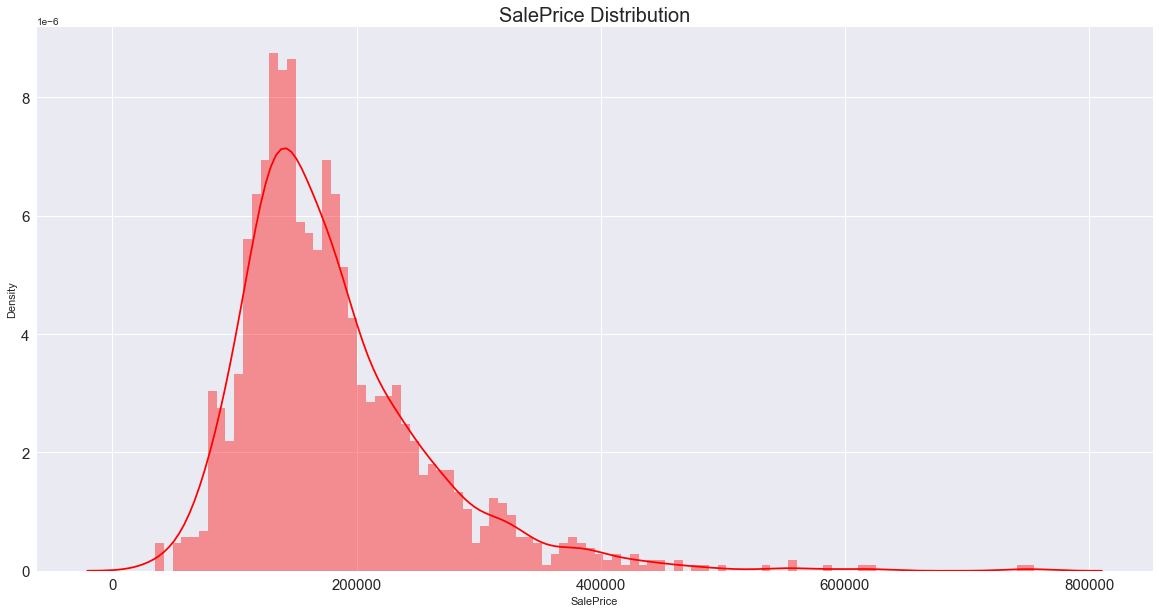

In [21]:
print(f'Skewness : {skew(df_train.SalePrice)}')
plt.figure(figsize=(20, 10))

plt.title('SalePrice Distribution', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
sns.distplot(df_train['SalePrice'], color='r', bins=100);

Bisa dilihat dari visualisasi di atas, bahwa distribusi dari _SalePrice_ miring ke kanan (skew). Distribusi _skew_ ini dapat menurunkan performa model, tetapi fungsi log dapat mengurangi _skewnees_ dan meningkatkan performa model

Skewness : 0.1212103673013655


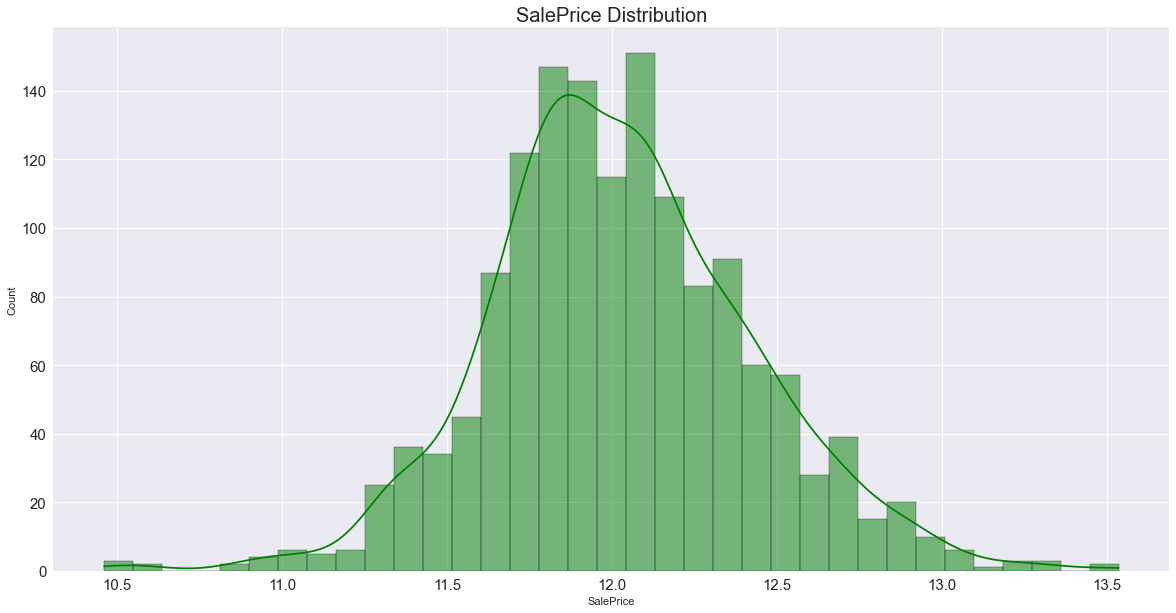

In [22]:
print(f'Skewness : {skew(np.log(df_train.SalePrice))}')

plt.figure(figsize=(20, 10))

plt.title('SalePrice Distribution', size=20)
plt.xticks(size=15)
plt.yticks(size=15)

sns.histplot(x=np.log(df_train['SalePrice']), color='g',kde=True);

__Melihat distribusi dari setiap feature yang bertipe data numerik__

In [23]:
df_num = df_train.select_dtypes(include = ['int64', 'float64'])
df_num.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

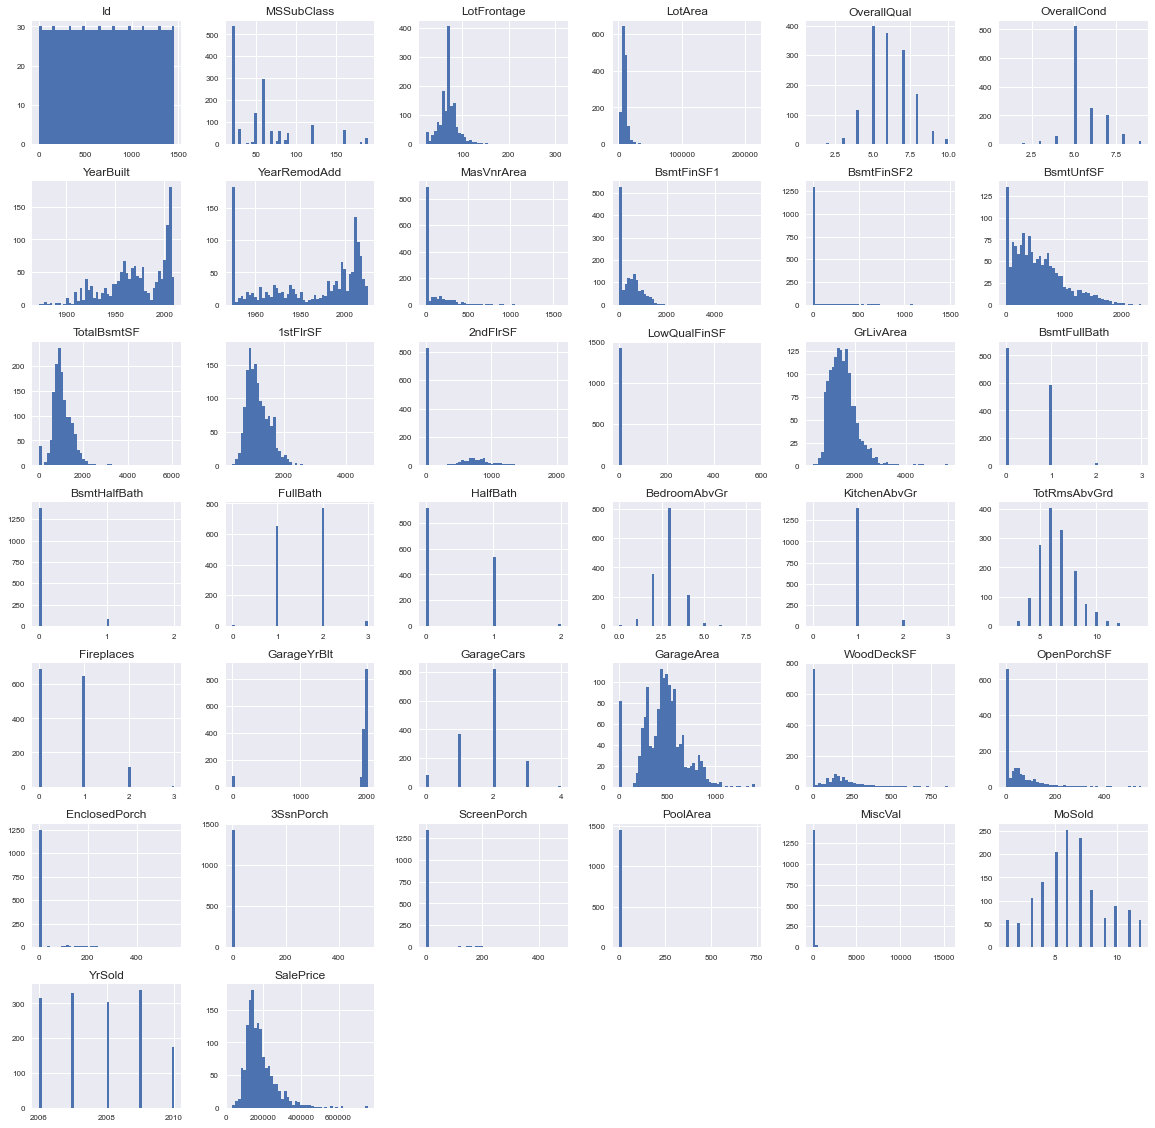

In [24]:
df_num.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)


plt.show()

__Melihat jumlah tipe penjualan__

In [25]:
saletype = pd.DataFrame(df_train.value_counts('SaleType'), columns=['Count'])

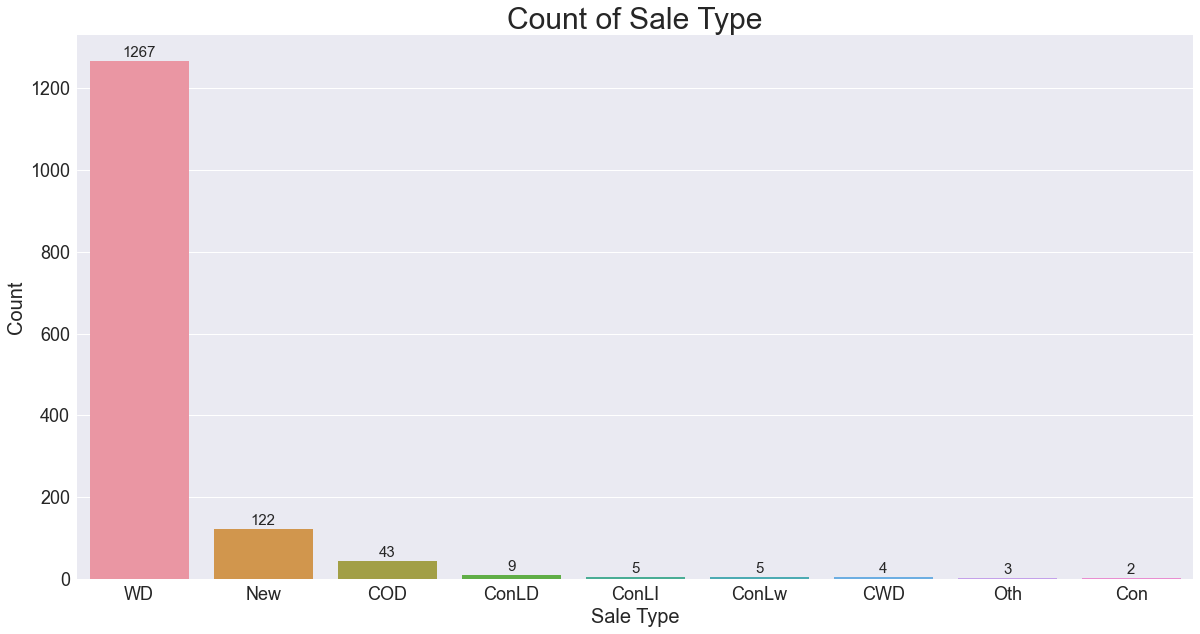

In [26]:
plt.figure(figsize=(20, 10))

plots = sns.barplot(x=saletype.index, y='Count', data=saletype)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Sale Type', size=20)
plt.ylabel("Count", size=20)
plt.title("Count of Sale Type", size=30)
plt.show()

- WD  : Warranty Deed - Conventional
- CWD	: Warranty Deed - Cash
- VWD	: Warranty Deed - VA Loan
- New	: Home just constructed and sold
- COD	: Court Officer Deed/Estate
- Con	: Contract 15% Down payment regular terms
- ConLw : Contract Low Down payment and low interest
- ConLI : Contract Low Interest
- ConLD : Contract Low Down
- Oth : Other

__Melihat jumlah kondisi penjualan__

In [27]:
salecondition = pd.DataFrame(df_train.value_counts('SaleCondition'), columns=['Count'])

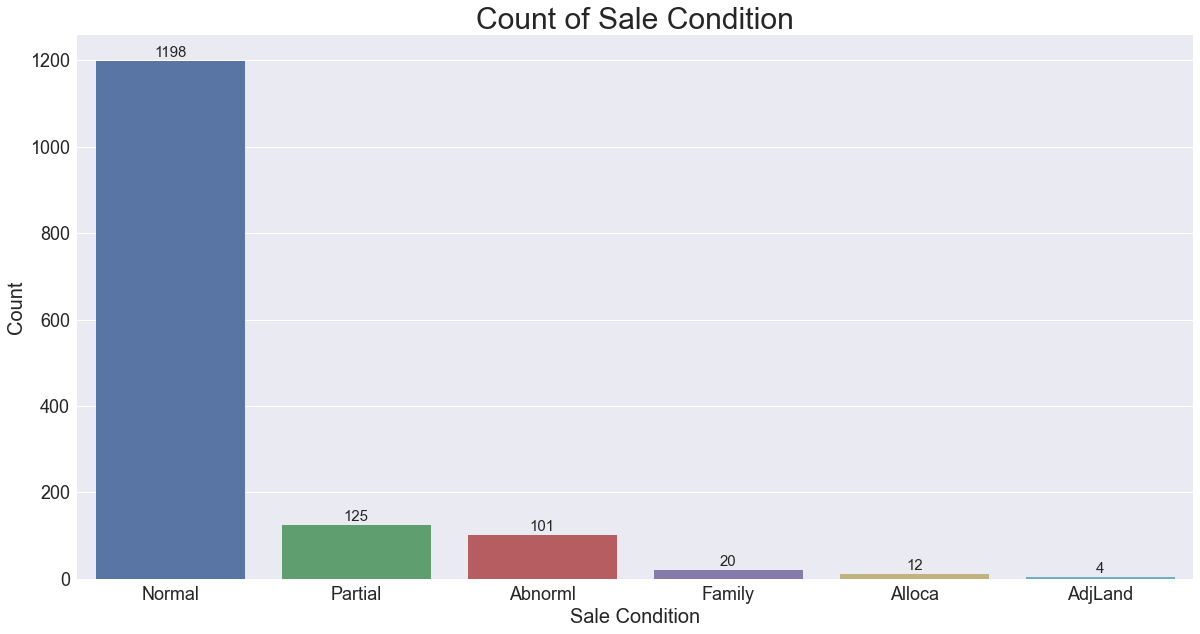

In [28]:
plt.figure(figsize=(20, 10))

plots = sns.barplot(x=salecondition.index, y='Count', data=salecondition)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Sale Condition', size=20)
plt.ylabel("Count", size=20)
plt.title("Count of Sale Condition", size=30)
plt.show()

- Normal : Normal Sale
- Abnorml : Abnormal Sale -  trade, foreclosure, short sale
- AdjLand : Adjoining Land Purchase
- Alloca : Allocation - two linked properties with separate deeds, typically condo with a garage unit	
- Family : Sale between family members
- Partial : Home was not completed when last assessed (associated with New Homes)

__Melihat rating dari kesuluruhan material dari rumah__

In [29]:
overallqual = pd.DataFrame(df_train.value_counts('OverallQual'), columns=['Count'])

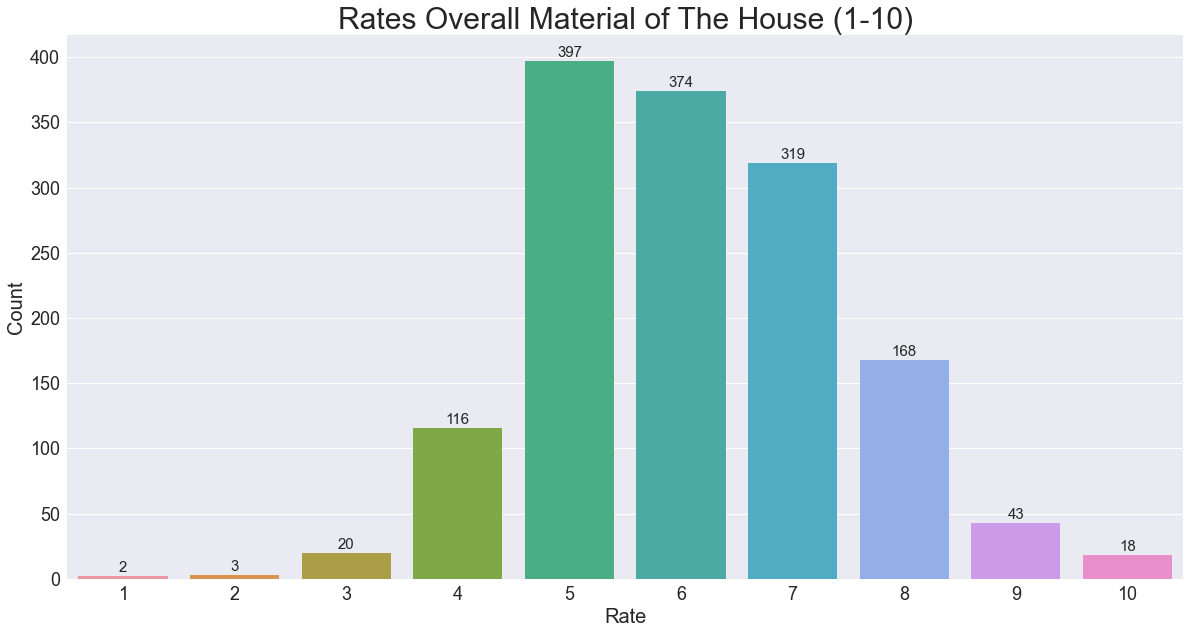

In [30]:
plt.figure(figsize=(20, 10))

plots = sns.barplot(x=overallqual.index, y='Count', data=overallqual)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Rate', size=20)
plt.ylabel("Count", size=20)
plt.title("Rates Overall Material of The House (1-10)", size=30)
plt.show()

- 10 : Very Excellent
- 9 : Excellent
- 8 : Very Good
- 7 : Good
- 6 : Above Average
- 5 : Average
- 4 : Below Average
- 3 : Fair
- 2 : Poor
- 1 : Very Poor

__Melihat rating dari kesuluruhan kondisi dari rumah__

In [31]:
overallcond = pd.DataFrame(df_train.value_counts('OverallCond'), columns=['Count'])

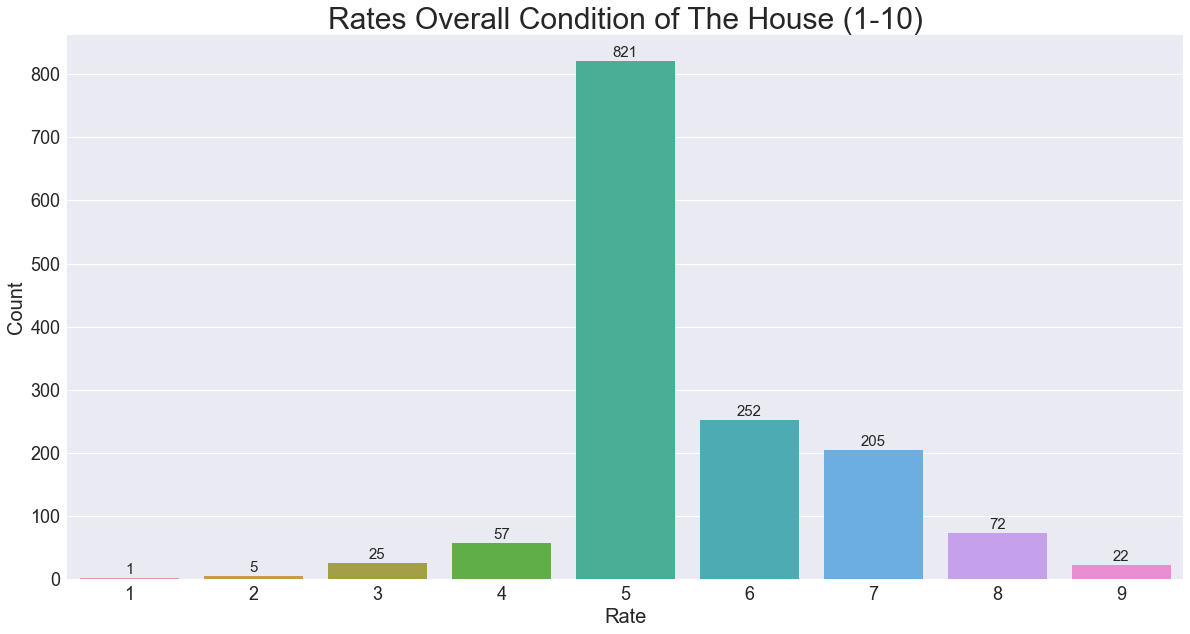

In [32]:
plt.figure(figsize=(20, 10))

plots = sns.barplot(x=overallcond.index, y='Count', data=overallcond)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Rate', size=20)
plt.ylabel("Count", size=20)
plt.title("Rates Overall Condition of The House (1-10)", size=30)
plt.show()

- 10 : Very Excellent
- 9 : Excellent
- 8 : Very Good
- 7 : Good
- 6 : Above Average
- 5 : Average
- 4 : Below Average
- 3 : Fair
- 2 : Poor
- 1 : Very Poor

__Melihat jumlah dari setiap neighborhood__

In [33]:
neighborhood = pd.DataFrame(df_train.value_counts('Neighborhood'), columns=['Count'])

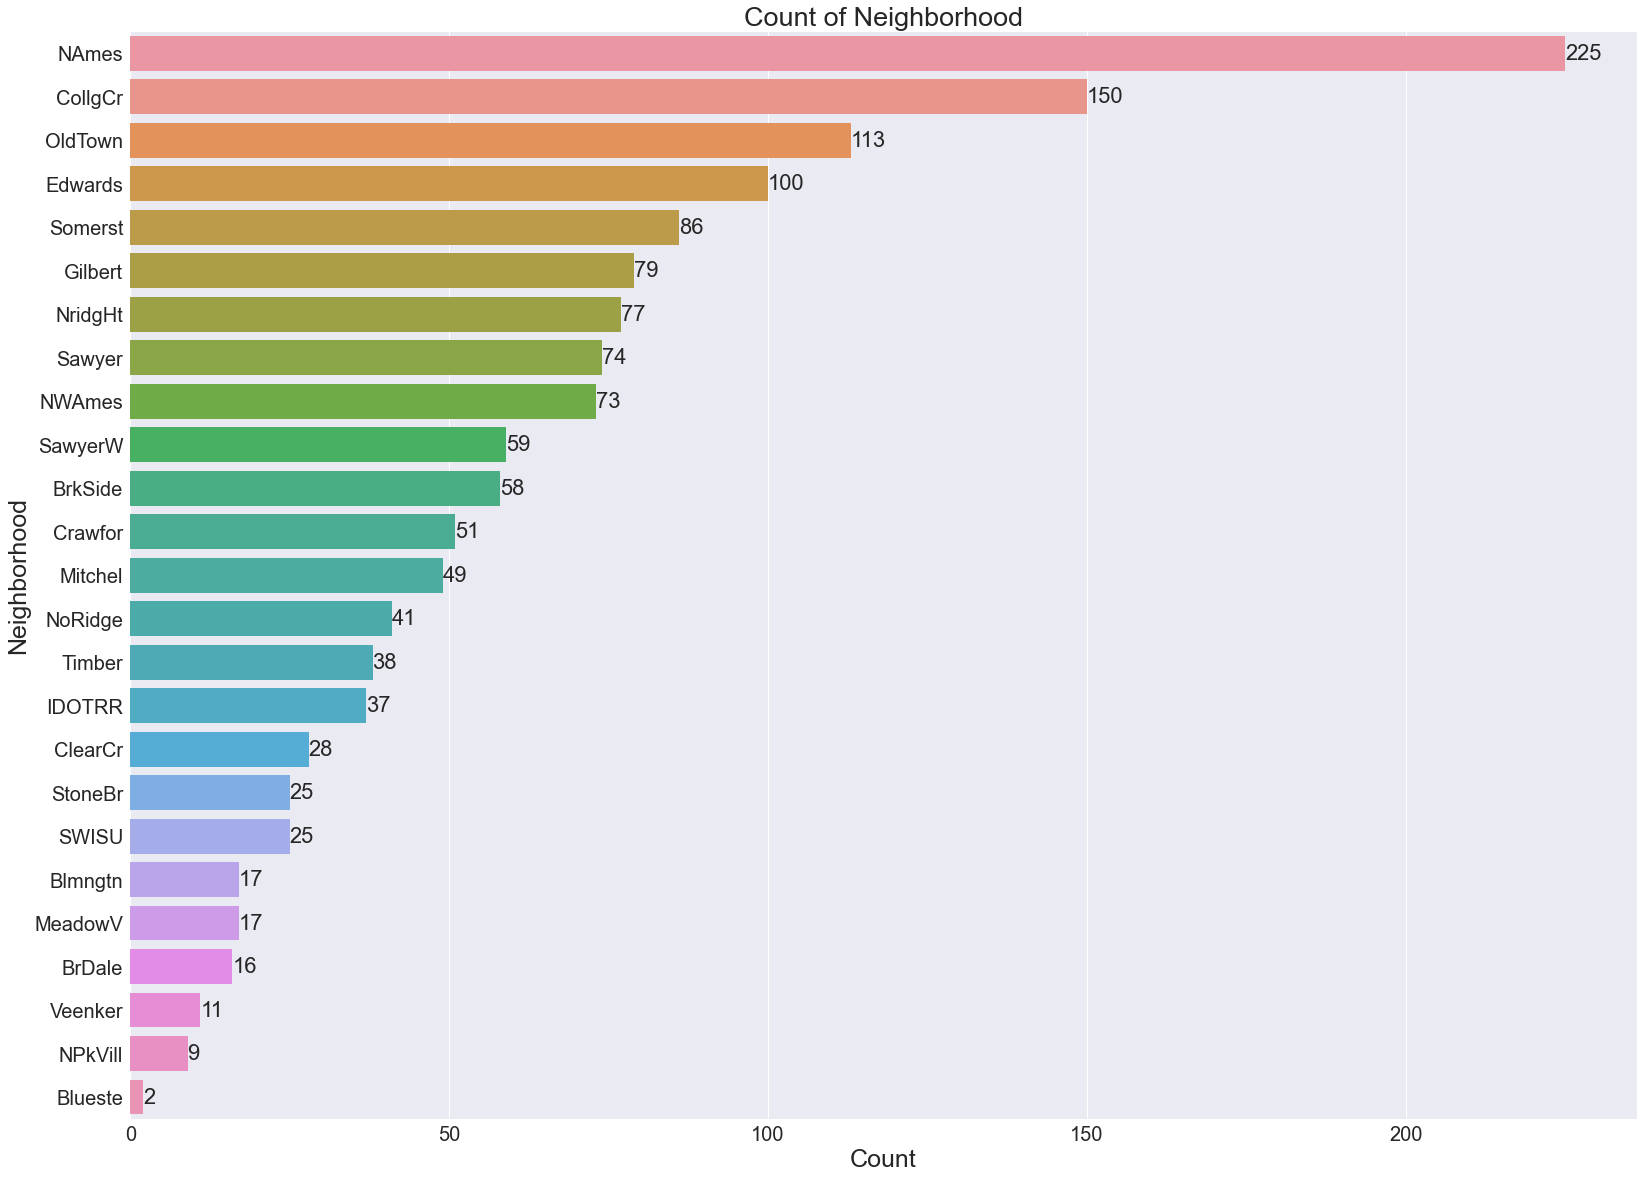

In [34]:
fig, ax = plt.subplots(figsize=(27, 20)) 
plots = sns.barplot(x='Count', y=neighborhood.index, data=neighborhood, orient='h')
 
ax.bar_label(ax.containers[0], size=22)
plt.title('Count of Neighborhood', size=27)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Count', size=25)
plt.ylabel('Neighborhood', size=25);

- Blmngtn	: Bloomington Heights
- Blueste	: Bluestem
- BrDale	: Briardale
- BrkSide	: Brookside
- ClearCr	: Clear Creek
- CollgCr	: College Creek
- Crawfor	: Crawford
- Edwards	: Edwards
- Gilbert	: Gilbert
- IDOTRR	: Iowa DOT and Rail Road
- MeadowV	: Meadow Village
- Mitchel	: Mitchell
- Names	    : North Ames
- NoRidge	: Northridge
- NPkVill	: Northpark Villa
- NridgHt	: Northridge Heights
- NWAmes	: Northwest Ames
- OldTown	: Old Town
- SWISU	    : South & West of Iowa State University
- Sawyer	: Sawyer
- SawyerW	: Sawyer West
- Somerst	: Somerset
- StoneBr	: Stone Brook
- Timber	: Timberland
- Veenker	: Veenker

__Melihat rata-rata harga berdasarkan neighbourhood__

In [35]:
avgprice_neighborhood = df_train.groupby('Neighborhood').agg({
    'SalePrice' : 'mean'
})

In [36]:
avgprice_neighborhood = avgprice_neighborhood.sort_values('SalePrice', ascending=False)

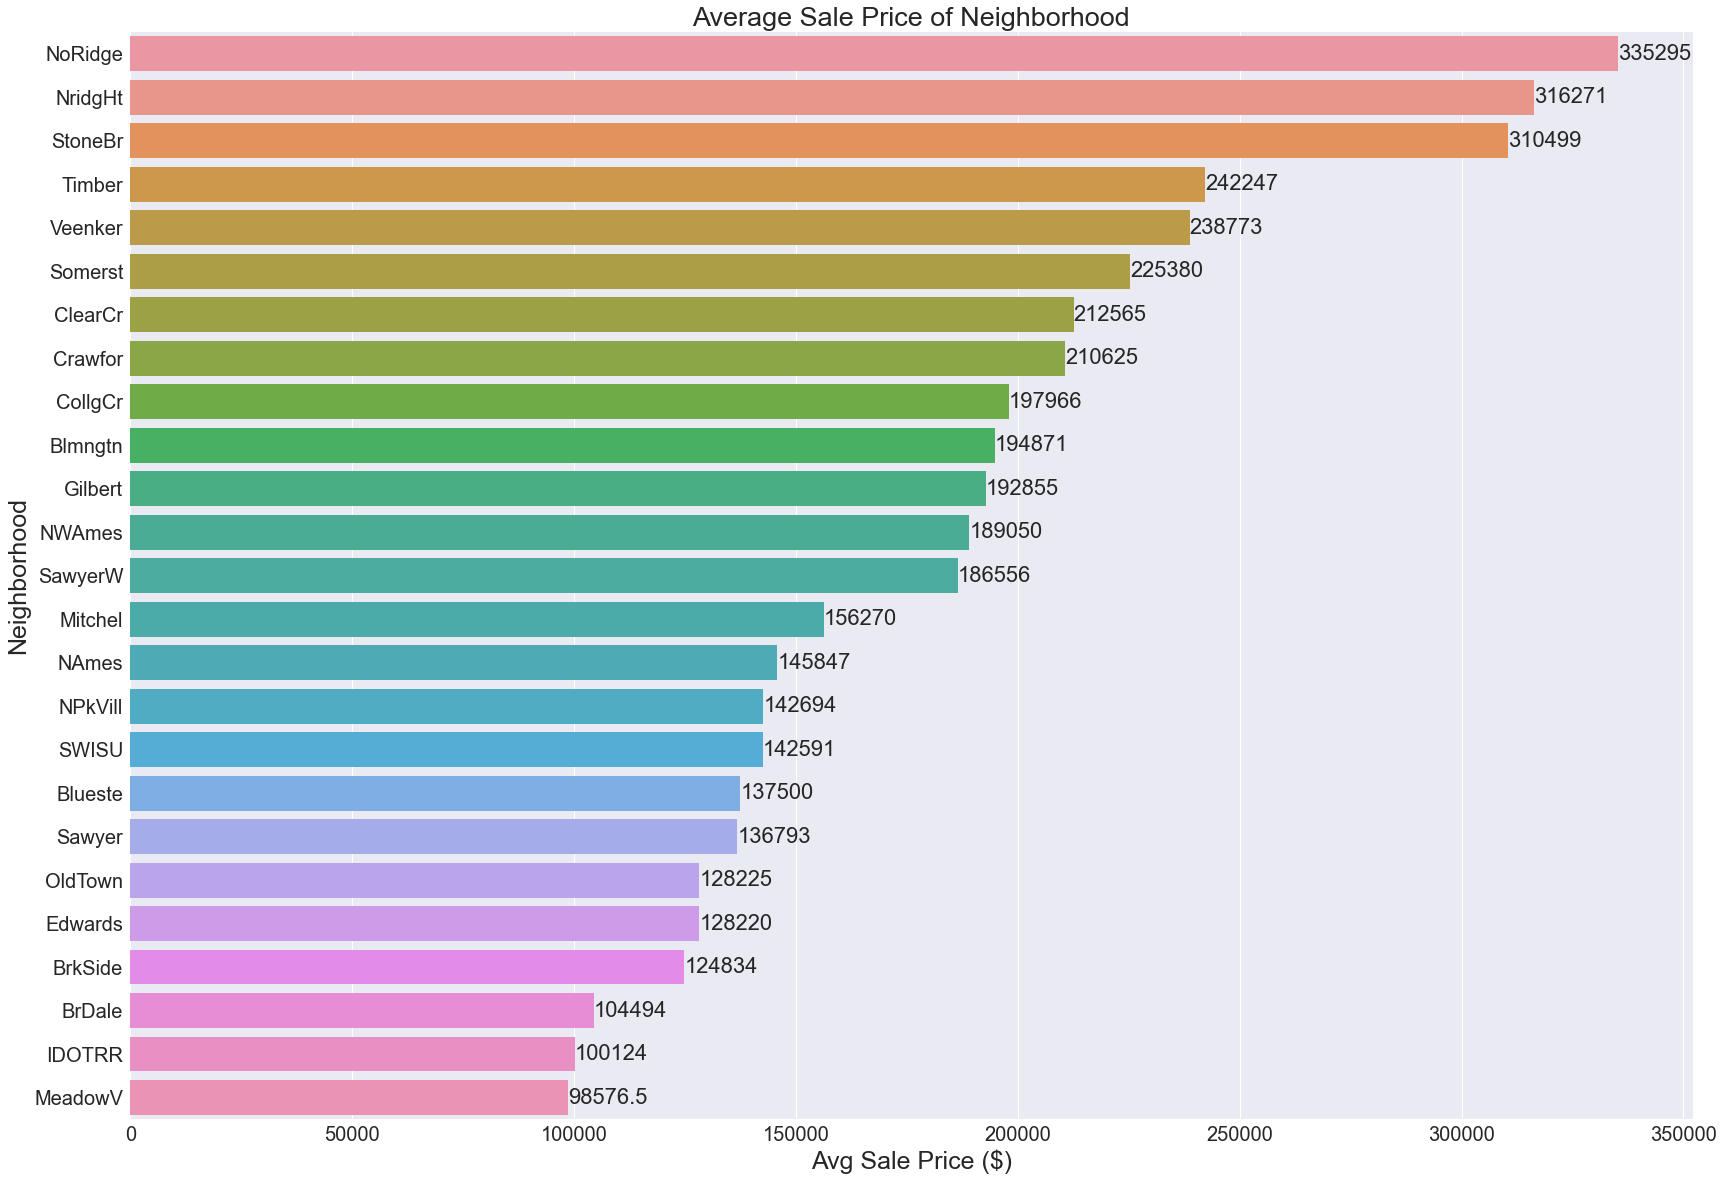

In [37]:
fig, ax = plt.subplots(figsize=(28, 20)) 
plots = sns.barplot(x='SalePrice', y=avgprice_neighborhood.index, data=avgprice_neighborhood, orient='h')
 
ax.bar_label(ax.containers[0], size=22)
plt.title('Average Sale Price of Neighborhood', size=27)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Avg Sale Price ($)', size=25)
plt.ylabel('Neighborhood', size=25);

__Melihat rata-rata harga berdasarkan rating dari keseluruhan material__ 

In [38]:
avgprice_quality = df_train.groupby('OverallQual').agg({
    'SalePrice' : 'mean'
})

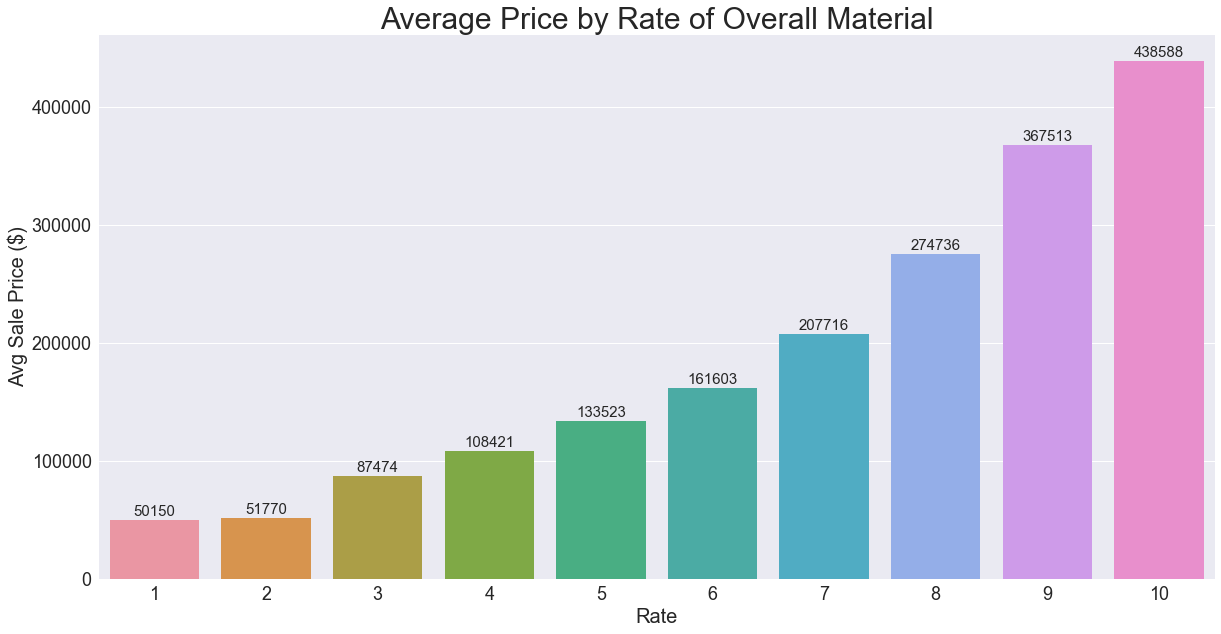

In [39]:
plt.figure(figsize=(20, 10))

plots = sns.barplot(x=avgprice_quality.index, y='SalePrice', data=avgprice_quality)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Rate', size=20)
plt.ylabel("Avg Sale Price ($)", size=20)
plt.title("Average Price by Rate of Overall Material", size=30)
plt.show()

__Melihat rata-rata harga berdasarkan rating dari kondisi keseluruhan__ 

In [40]:
avgprice_condition = df_train.groupby('OverallCond').agg({
    'SalePrice' : 'mean'
})

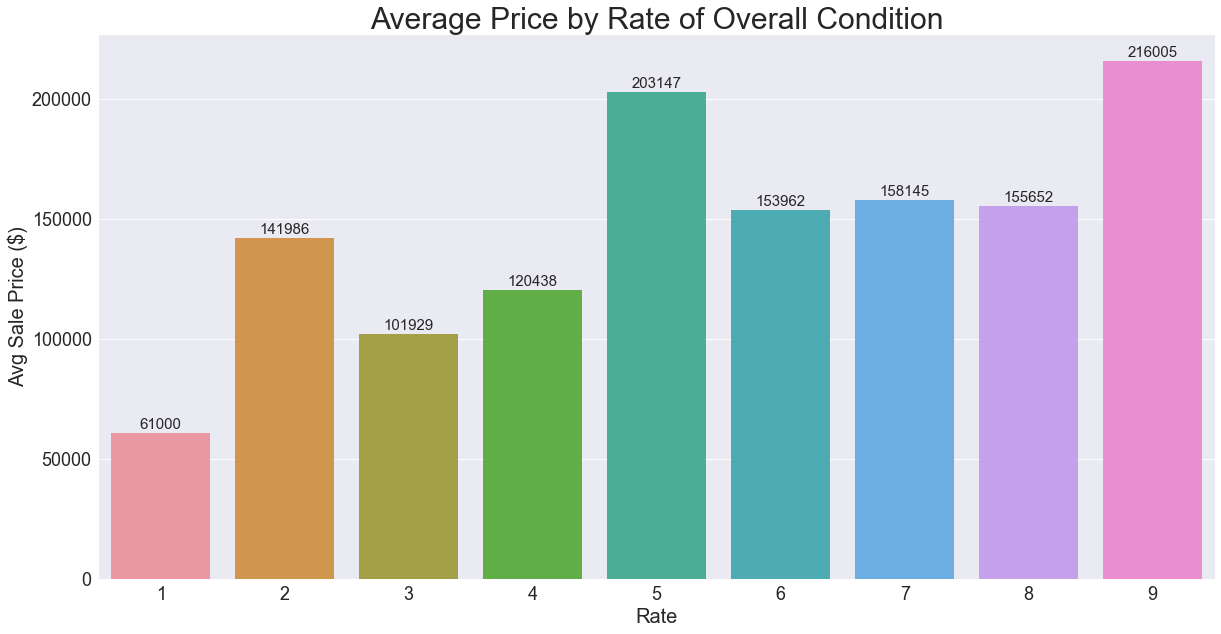

In [41]:
plt.figure(figsize=(20, 10))

plots = sns.barplot(x=avgprice_condition.index, y='SalePrice', data=avgprice_condition)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Rate', size=20)
plt.ylabel("Avg Sale Price ($)", size=20)
plt.title("Average Price by Rate of Overall Condition", size=30)
plt.show()

__Melihat 10 harga rata-rata tertinggi berdasarkan tahun pembuatan__

In [42]:
topten_yearbuilt = df_train.groupby('YearBuilt').agg({
    'SalePrice' : 'mean'
})
topten_yearbuilt['Year'] = topten_yearbuilt.index
topten_yearbuilt = topten_yearbuilt.sort_values('SalePrice', ascending=False)

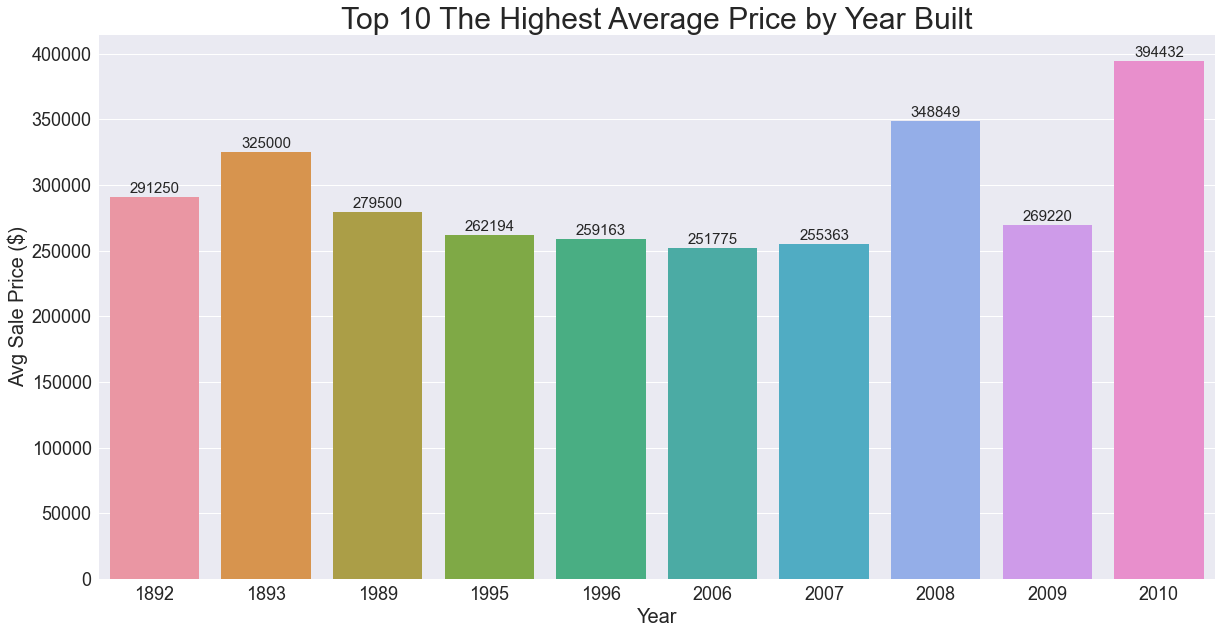

In [43]:
plt.figure(figsize=(20, 10))

plots = sns.barplot(x='Year', y='SalePrice', data=topten_yearbuilt.head(10))

for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Year', size=20)
plt.ylabel("Avg Sale Price ($)", size=20)
plt.title("Top 10 The Highest Average Price by Year Built", size=30)
plt.show()

__Melihat 10 harga rata-rata terendah berdasarkan tahun pembuatan__

In [44]:
lowten_yearbuilt = df_train.groupby('YearBuilt').agg({
    'SalePrice' : 'mean'
})
lowten_yearbuilt['Year'] = lowten_yearbuilt.index
lowten_yearbuilt = lowten_yearbuilt.sort_values('SalePrice')

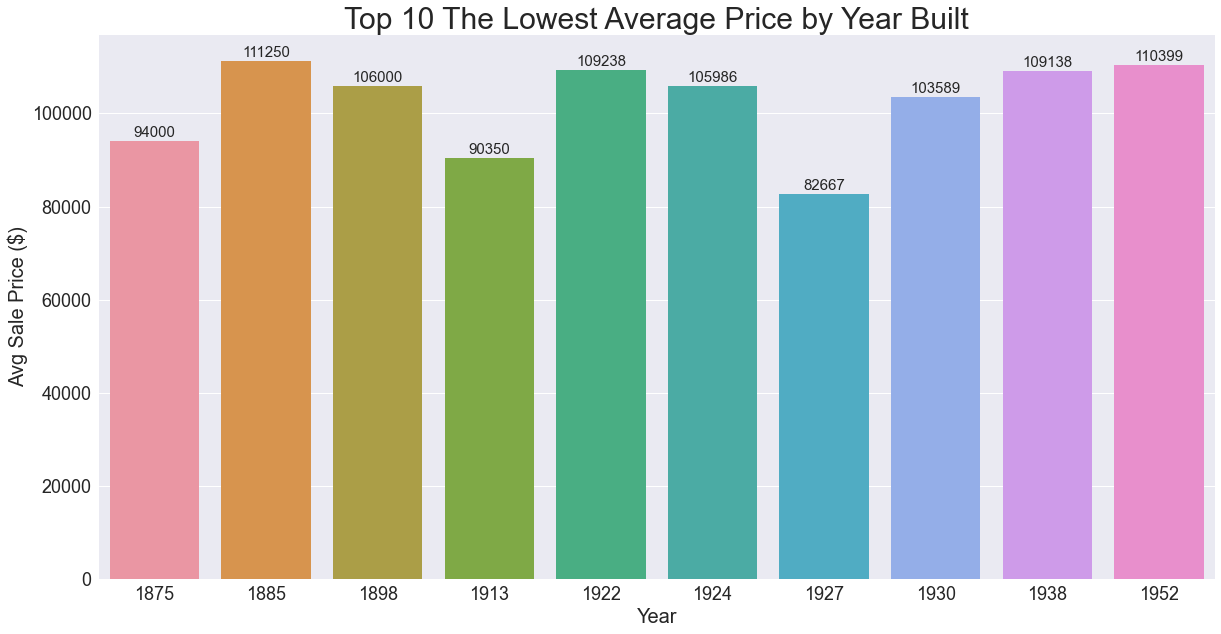

In [45]:
plt.figure(figsize=(20, 10))

plots = sns.barplot(x='Year', y='SalePrice', data=lowten_yearbuilt.head(10))

for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Year', size=20)
plt.ylabel("Avg Sale Price ($)", size=20)
plt.title("Top 10 The Lowest Average Price by Year Built", size=30)
plt.show()

# Preprocessing

__Drop kolom 'Id'__

In [167]:
del df_train['Id']

__Transformasi data kategorik menggunakan "ordinal encoder"__

In [168]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

In [169]:
cat_var = df_train[['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']]

In [170]:
column = list(df_train.select_dtypes(include=['object']).columns)

In [171]:
Ord_enc = pd.DataFrame(ordinal_encoder.fit_transform(cat_var))
Ord_enc.columns = column

In [172]:
Ord_enc

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,4.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
1,3.0,1.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,1.0,1.0,8.0,8.0,2.0,3.0,4.0,1.0,2.0,4.0,1.0,0.0,6.0,1.0,0.0,1.0,4.0,3.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
2,3.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,4.0,2.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
3,3.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,1.0,1.0,13.0,15.0,2.0,3.0,4.0,0.0,4.0,1.0,3.0,0.0,6.0,1.0,2.0,1.0,4.0,2.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0
4,3.0,1.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,4.0,0.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,0.0,5.0,1.0,1.0,12.0,13.0,2.0,3.0,4.0,2.0,2.0,4.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,3.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
1456,3.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,14.0,2.0,2.0,0.0,2.0,1.0,1.0,9.0,10.0,3.0,3.0,4.0,1.0,2.0,4.0,3.0,0.0,5.0,1.0,4.0,1.0,4.0,3.0,2.0,5.0,1.0,3.0,5.0,5.0,2.0,3.0,2.0,1.0,8.0,4.0
1457,3.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,6.0,2.0,2.0,0.0,5.0,1.0,1.0,5.0,5.0,2.0,0.0,2.0,4.0,4.0,1.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,1.0,2.0,5.0,5.0,2.0,3.0,0.0,3.0,8.0,4.0
1458,3.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,12.0,2.0,2.0,0.0,2.0,3.0,1.0,8.0,8.0,2.0,3.0,4.0,1.0,4.0,4.0,2.0,2.0,5.0,1.0,2.0,1.0,0.0,2.0,6.0,3.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0


In [173]:
#gabungkan hasil encoder dengan keseluruhan data
df_train[column] = Ord_enc

In [175]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3.0,65.0,8450,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,5,2003,2003,1.0,1.0,12.0,13.0,1.0,196.0,2.0,4.0,2.0,2.0,4.0,3.0,2.0,706,6.0,0,150,856,1.0,0.0,1.0,4.0,856,854,0,1710,1,0,2,1,3,1,2.0,8,6.0,0,3.0,1.0,2003.0,2.0,2,548,5.0,5.0,2.0,0,61,0,0,0,0,3.0,4.0,1.0,0,2,2008,8.0,4.0,208500
1,20,3.0,80.0,9600,1.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,6,8,1976,1976,1.0,1.0,8.0,8.0,2.0,0.0,3.0,4.0,1.0,2.0,4.0,1.0,0.0,978,6.0,0,284,1262,1.0,0.0,1.0,4.0,1262,0,0,1262,0,1,2,0,3,1,3.0,6,6.0,1,5.0,1.0,1976.0,2.0,2,460,5.0,5.0,2.0,298,0,0,0,0,0,3.0,4.0,1.0,0,5,2007,8.0,4.0,181500
2,60,3.0,68.0,11250,1.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,5,2001,2002,1.0,1.0,12.0,13.0,1.0,162.0,2.0,4.0,2.0,2.0,4.0,2.0,2.0,486,6.0,0,434,920,1.0,0.0,1.0,4.0,920,866,0,1786,1,0,2,1,3,1,2.0,6,6.0,1,5.0,1.0,2001.0,2.0,2,608,5.0,5.0,2.0,0,42,0,0,0,0,3.0,4.0,1.0,0,9,2008,8.0,4.0,223500
3,70,3.0,60.0,9550,1.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,7,5,1915,1970,1.0,1.0,13.0,15.0,2.0,0.0,3.0,4.0,0.0,4.0,1.0,3.0,0.0,216,6.0,0,540,756,1.0,2.0,1.0,4.0,961,756,0,1717,1,0,1,0,3,1,2.0,7,6.0,1,2.0,5.0,1998.0,3.0,3,642,5.0,5.0,2.0,0,35,272,0,0,0,3.0,4.0,1.0,0,2,2006,8.0,0.0,140000
4,60,3.0,84.0,14260,1.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,8,5,2000,2000,1.0,1.0,12.0,13.0,1.0,350.0,2.0,4.0,2.0,2.0,4.0,0.0,2.0,655,6.0,0,490,1145,1.0,0.0,1.0,4.0,1145,1053,0,2198,1,0,2,1,4,1,2.0,9,6.0,1,5.0,1.0,2000.0,2.0,3,836,5.0,5.0,2.0,192,84,0,0,0,0,3.0,4.0,1.0,0,12,2008,8.0,4.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3.0,62.0,7917,1.0,1.0,3.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,0.0,5.0,6,5,1999,2000,1.0,1.0,12.0,13.0,2.0,0.0,3.0,4.0,2.0,2.0,4.0,3.0,6.0,0,6.0,0,953,953,1.0,0.0,1.0,4.0,953,694,0,1647,0,0,2,1,3,1,3.0,7,6.0,1,5.0,1.0,1999.0,2.0,2,460,5.0,5.0,2.0,0,40,0,0,0,0,3.0,4.0,1.0,0,8,2007,8.0,4.0,175000
1456,20,3.0,85.0,13175,1.0,1.0,3.0,3.0,0.0,4.0,0.0,14.0,2.0,2.0,0.0,2.0,6,6,1978,1988,1.0,1.0,9.0,10.0,3.0,119.0,3.0,4.0,1.0,2.0,4.0,3.0,0.0,790,5.0,163,589,1542,1.0,4.0,1.0,4.0,2073,0,0,2073,1,0,2,0,3,1,3.0,7,2.0,2,5.0,1.0,1978.0,3.0,2,500,5.0,5.0,2.0,349,0,0,0,0,0,3.0,2.0,1.0,0,2,2010,8.0,4.0,210000
1457,70,3.0,66.0,9042,1.0,1.0,3.0,3.0,0.0,4.0,0.0,6.0,2.0,2.0,0.0,5.0,7,9,1941,2006,1.0,1.0,5.0,5.0,2.0,0.0,0.0,2.0,4.0,4.0,1.0,3.0,2.0,275,6.0,0,877,1152,1.0,0.0,1.0,4.0,1188,1152,0,2340,0,0,2,0,4,1,2.0,9,6.0,2,2.0,1.0,1941.0,2.0,1,252,5.0,5.0,2.0,0,60,0,0,0,0,3.0,0.0,3.0,2500,5,2010,8.0,4.0,266500
1458,20,3.0,68.0,9717,1.0,1.0,3.0,3.0,0.0,4.0,0.0,12.0,2.0,2.0,0.0,2.0,5,6,1950,1996,3.0,1.0,8.0,8.0,2.0,0.0,3.0,4.0,1.0,4.0,4.0,2.0,2.0,49,5.0,1029,0,1078,1.0,2.0,1.0,0.0,1078,0,0,1078,1,0,1,0,2,1,2.0,5,6.0,0,3.0,1.0,1950.0,3.0,1,240,5.0,5.0,2.0,366,0,112,0,0,0,3.0,4.0,1.0,0,4,2010,8.0,4.0,142125


__Melihat korelasi features tipe data numerik__

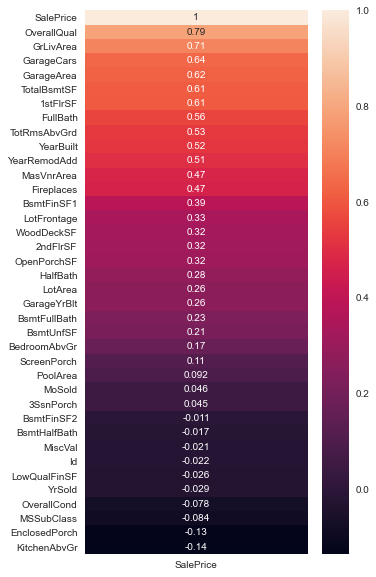

In [65]:
plt.figure(figsize=(5, 10))
sns.heatmap(df_num.corr()[['SalePrice']].sort_values(by=['SalePrice'], ascending=False), annot=True)
plt.show()

__Melihat korelasi feature tipe data kategorik__

In [67]:
df_cat = Ord_enc
df_cat['SalePrice'] = df_train['SalePrice']

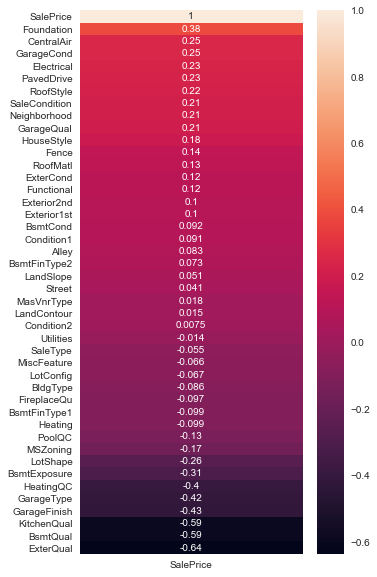

In [68]:
plt.figure(figsize=(5, 10))
sns.heatmap(df_cat.corr()[['SalePrice']].sort_values(by=['SalePrice'], ascending=False), annot=True)
plt.show()

__Mencari feature yang memiliki korelasi kuat dengan target (>0.5)__

sumber : https://www.scribbr.com/statistics/pearson-correlation-coefficient/

In [69]:
korelasi = abs(df_train.corr()['SalePrice'])[:-1]
korelasi_high = korelasi[korelasi > 0.5].sort_values(ascending=False)

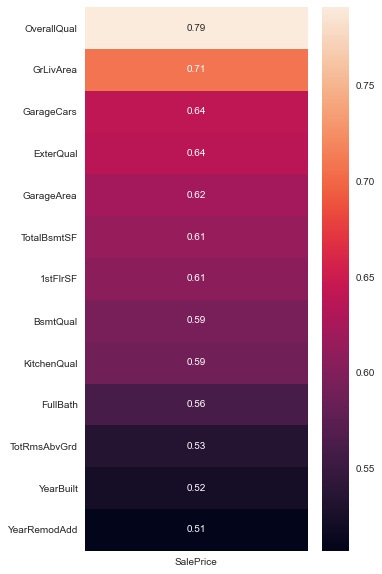

In [70]:
plt.figure(figsize=(5, 10))
sns.heatmap(pd.DataFrame(korelasi_high), annot=True)
plt.show()

__Melihat semua korelasi__

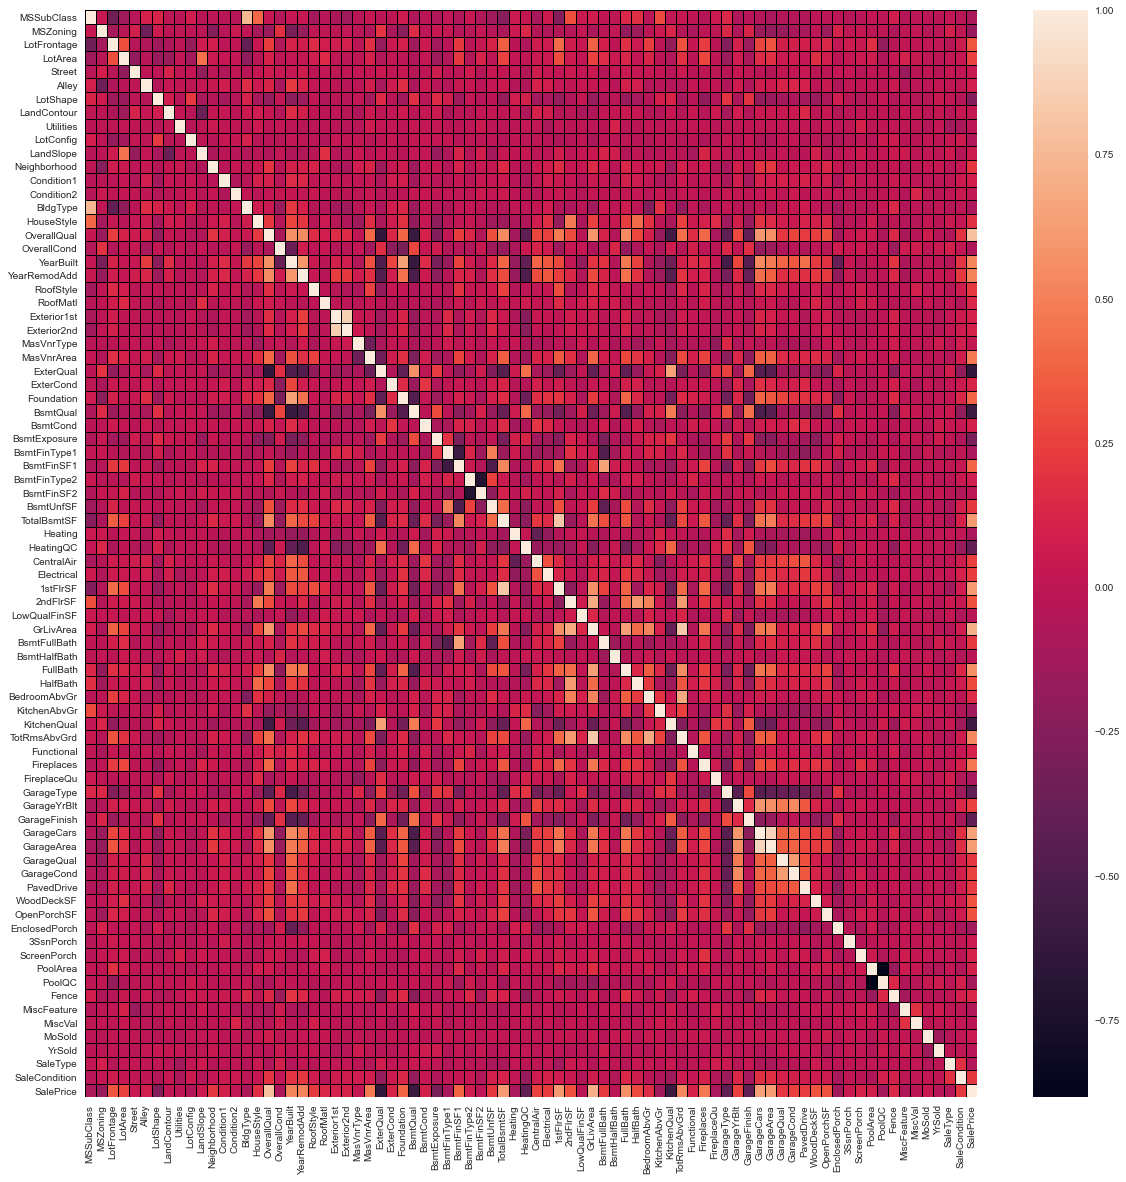

In [71]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_train.corr(), linewidths=1, linecolor='black')
plt.show()

# Modeling

__Bagi data menjadi train dan test__

In [176]:
from sklearn.model_selection import train_test_split

X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

X = np.log1p(X) #scaling
y = np.log(y)

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

__Mencari best parameter pada _Random Forest_ dan _XGBoost_.__

In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

__HyperParameter Tunning Random Forest__

In [29]:
import time
start_time = time.time()

params = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [3, 6, 9, 12, 15],
}

gsearchrf = GridSearchCV(
    estimator=RandomForestRegressor( 
        n_jobs=-1,
        random_state=0),
    param_grid=params,
    scoring='r2',
    n_jobs=-1,
    cv=5
)

gsearchrf.fit(np.log1p(X), np.log(y))
print(f'Time Elapsed: {time.time() - start_time}s')

Time Elapsed: 117.18479108810425s


In [30]:
print(f'Best Parameter Random Forest: {gsearchrf.best_params_}')
print(f'Best Score: {gsearchrf.best_score_}')

Best Parameter Random Forest: {'max_depth': 15, 'n_estimators': 400}
Best Score: 0.8708504885268689


__HyperParameter Tunning XGBoost__

In [31]:
from sklearn.model_selection import GridSearchCV
import time
start_time = time.time()

params = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [3, 6, 9, 12, 15],
    'subsample': [0.5, 0.8, 0.9]
}

gsearchxgb = GridSearchCV(
    estimator=XGBRegressor(
        learning_rate=0.1, 
        n_jobs=-1,
        random_state=0),
    param_grid=params,
    scoring='r2',
    n_jobs=-1,
    cv=5
)

gsearchxgb.fit(np.log1p(X), np.log(y))
print(f'Time Elapsed: {time.time() - start_time}s')

Time Elapsed: 185.45222115516663s


In [32]:
print(f'Best Parameter XGBoost: {gsearchxgb.best_params_}')
print(f'Best Score: {gsearchxgb.best_score_}')

Best Parameter XGBoost: {'max_depth': 3, 'n_estimators': 400, 'subsample': 0.9}
Best Score: 0.8997082157437319


__Latih data__

In [179]:
lr = LinearRegression()
rf_reg = RandomForestRegressor(n_estimators=400, max_depth=15)
xgb = XGBRegressor(n_estimators=400, max_depth=3, subsample=0.9)

In [180]:
lr.fit(X_train, y_train) #Linear regression

LinearRegression()

In [181]:
rf_reg.fit(X_train, y_train) #Random forest regression

RandomForestRegressor(max_depth=15, n_estimators=400)

In [182]:
xgb.fit(X_train, y_train) #XGBosst reggresion

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

__Evaluasi Model__

In [183]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

### Linear Regression

In [185]:
y_predictlr = lr.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_predictlr))

r2_lr = r2_score(y_test, y_predictlr)

print(f"Linear Regression - R2 Score : {r2_lr}")
print(f"Linear Regression - Mean Absolute Error : {mean_absolute_error(y_test, y_predictlr)}")
print(f"Linear Regression - Root Mean Squared Error : {rmse}")

Linear Regression - R2 Score : 0.808937071833077
Linear Regression - Mean Absolute Error : 0.09986308811235443
Linear Regression - Root Mean Squared Error : 0.17007909076286604


### Random Forest

In [189]:
y_predictrf = rf_reg.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_predictrf))

r2_rf = r2_score(y_test, y_predictrf)

print(f"Random Forest - R2 Score Test : {r2_rf}")
print(f"Random Forest - Mean Absolute Error : {mean_absolute_error(y_test, y_predictrf)}")
print(f"Random Forest - Root Mean Squared Error : {rmse}")

Random Forest - R2 Score Test : 0.8806047871835692
Random Forest - Mean Absolute Error : 0.08970232331440325
Random Forest - Root Mean Squared Error : 0.13444856392813298


### XGBoost

In [190]:
y_predictxgb = xgb.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_predictxgb))

r2_xgb = r2_score(y_test, y_predictxgb)

print(f"XGBoost - R2 Score Test : {r2_xgb}")
print(f"XGBoost - Mean Absolute Error : {mean_absolute_error(y_test, y_predictxgb)}")
print(f"XGBoost - Root Mean Squared Error : {rmse}")

XGBoost - R2 Score Test : 0.8868297599935892
XGBoost - Mean Absolute Error : 0.09038191773481281
XGBoost - Root Mean Squared Error : 0.13089673962003945


__Kesimpulan__ : Algoritma Random Forest dan XGBoost memiliki performa yang sangat baik dan perbedaan evaluasi metrics dari kedua algortima tersebut tidak terlalu signifikan

# Prediksi Data Baru

In [191]:
df_test = pd.read_csv('test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


__Cleaning Data Test__

In [192]:
column_missing = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
                 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

for col in column_missing:
    df_test[col].fillna('None', inplace=True)

In [193]:
df_test['MasVnrArea'].fillna(0, inplace=True)
df_test['MasVnrType'].fillna('None', inplace=True)

In [194]:
df_test['GarageYrBlt'].fillna(0, inplace=True)

In [195]:
median = df_test['LotFrontage'].median()
df_test['LotFrontage'].fillna(median, inplace=True)

In [196]:
mode = df_test['Electrical'].mode()[0]
df_test['Electrical'].fillna(mode, inplace=True)

In [197]:
df_test.dropna(inplace=True)

In [198]:
df_test.reset_index(drop=True, inplace=True)

__Preprocessing Data Test__

In [199]:
cat_var = df_test[['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']]

column = list(df_test.select_dtypes(include=['object']).columns)
Ord_enc = pd.DataFrame(ordinal_encoder.fit_transform(cat_var))
Ord_enc.columns = column

In [200]:
df_test[column] = Ord_enc

__Prediksi__

In [201]:
data_baru = df_test.drop('Id', axis=1)

In [206]:
hasil_prediksi = rf_reg.predict(np.log1p(data_baru))

__Tampilkan hasil prediksi__

In [208]:
data = df_test['Id']

In [209]:
#Use the exponential function to return predicted sale prices
#Gunakan fungsi eksponen untuk mengembalikkan prediksi harganya

prediction = pd.DataFrame(np.exp(hasil_prediksi), columns=['Prediction Price']) 

In [210]:
df_prediksi = pd.concat([data, prediction], axis=1)

In [212]:
df_prediksi.head(10)

,Id,Prediction Price
0,1461,121271.595967
1,1462,154216.323764
2,1463,179181.120840
3,1464,180334.481972
4,1465,198743.267468
5,1466,181605.177677
6,1467,163157.688304
7,1468,173664.059002
8,1469,184328.248028
9,1470,128506.678040
